In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [39]:
# a = 5
# tau_n = 60

a = 7
tau_n = 39
# I_app_values = [-4.258153, -4.256908, -4.256906,-4.256889, -4.250038]
I_app_values = np.linspace(-6.4, -6.2, 5)


def fh_n(t, y, a, tau_n, I):
    v, n = y
    dvdt = v - (v**3) / 3 - n + I
    dndt = (a * v - n) / tau_n
    return [dvdt, dndt]

In [40]:
t_span = [0, 200]
y0 = [-0.5, -4.0]
solutions = []

for I_app in I_app_values:
    sol = solve_ivp(fh_n, t_span, y0, args=(a, tau_n, I_app), dense_output=True, max_step=0.1)
    solutions.append((I_app, sol))

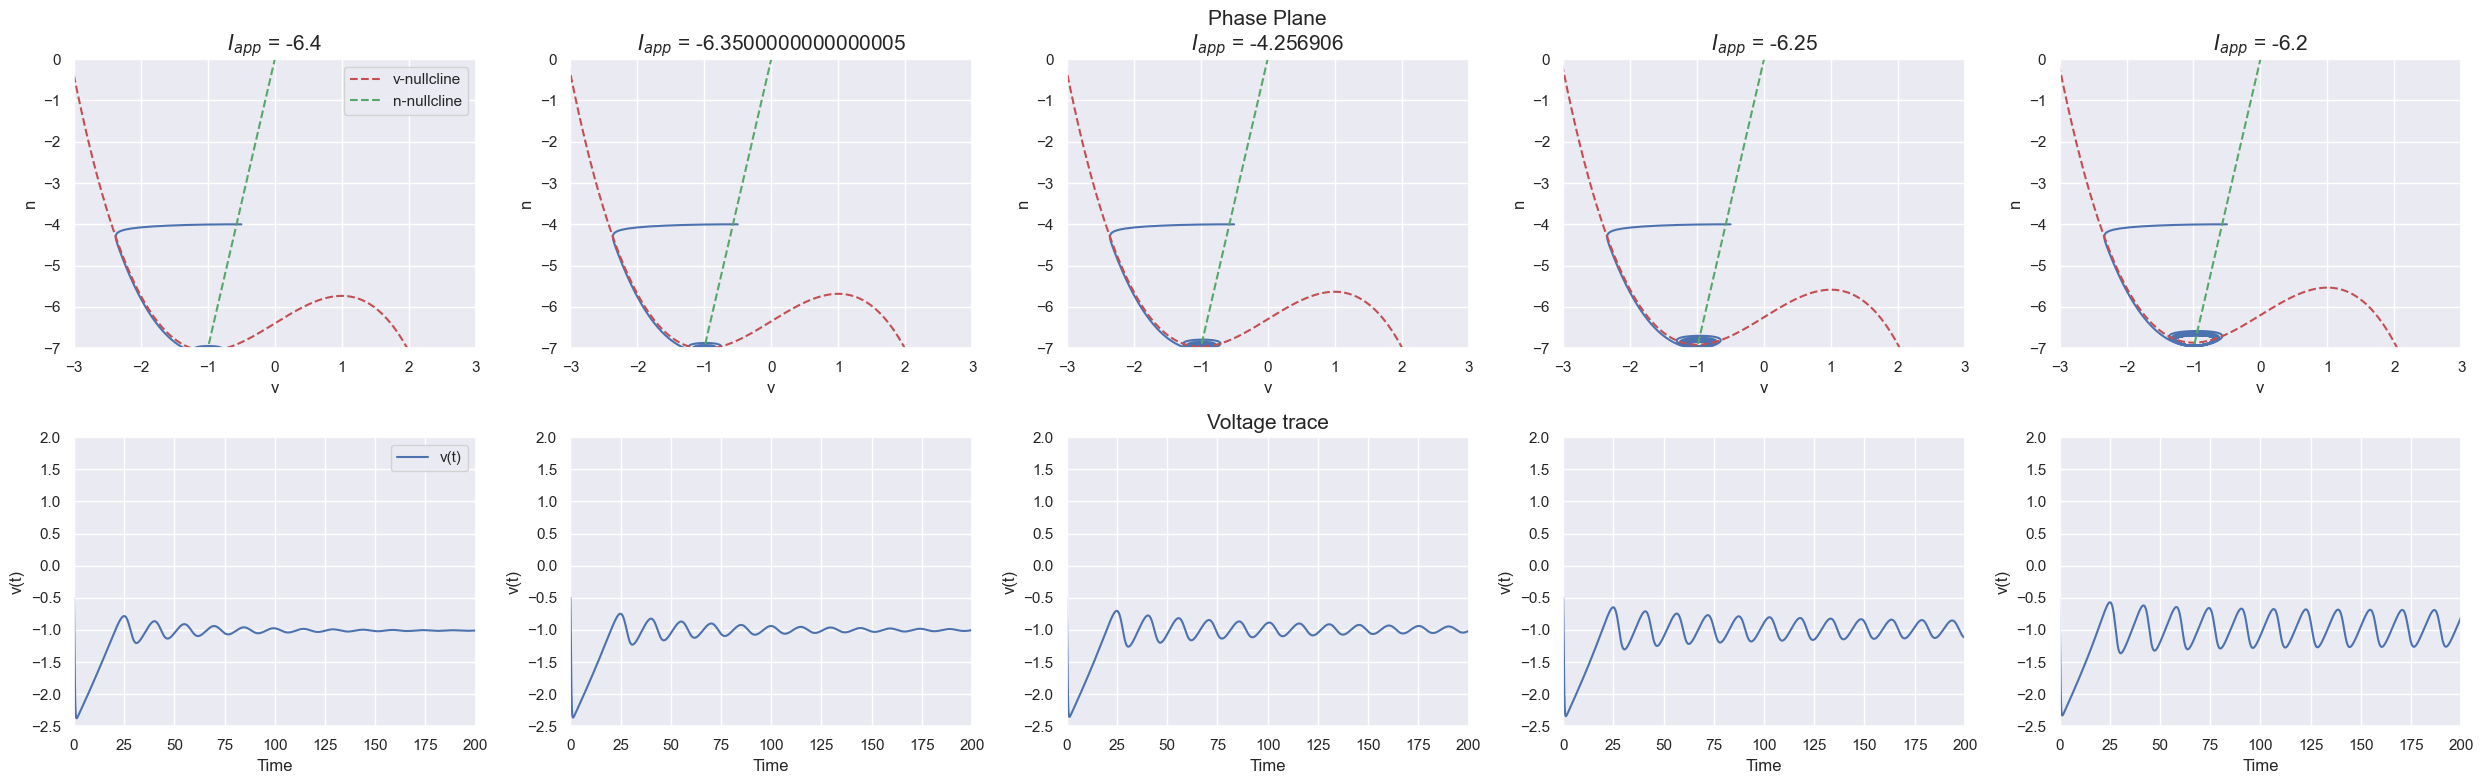

In [41]:
# Plotting
sns.set_theme(style="darkgrid")
num_plots = len(solutions)
fig, axes = plt.subplots(2, num_plots, figsize=(5 * num_plots, 8))

v_vals = np.linspace(-4, 4, 300)



for i, (I_app, sol) in enumerate(solutions):
    v_nullcline = v_vals - (v_vals**3) / 3 + I_app
    n_nullcline = a * v_vals

    # Phase plane
    ax1 = axes[0, i]
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-7, 0)
    ax1.plot(sol.y[0], sol.y[1])#, label='Trajectory')
    ax1.plot(v_vals, v_nullcline, 'r--', label='v-nullcline')
    ax1.plot(v_vals, n_nullcline, 'g--', label='n-nullcline')
    
    ax1.set_xlabel('v')
    ax1.set_ylabel('n')
    ax1.grid(True)
    if i == 0:
        ax1.legend()

    # Time series
    ax2 = axes[1, i]
    ax2.plot(sol.t, sol.y[0], label='v(t)')
    # ax2.plot(sol.t, sol.y[1], label='n(t)', color='orange')
    # ax2.set_title('Voltage trace')
    ax2.set_ylabel('v(t)')
    ax2.set_xlabel('Time')
    if i == 0:
        # ax2.set_ylabel('v(t), n(t)')
        ax2.legend()
    ax2.grid(True)
    ax2.set_xlim(0, 200)
    ax2.set_ylim(-2.5, 2)
    if i == 2:
        ax1.set_title('Phase Plane\n$I_{{app}}$ = -4.256906', fontsize=15)
        ax2.set_title('Voltage trace', fontsize=15)
    else:
        ax1.set_title(f'$I_{{app}}$ = {I_app}', fontsize=15)



plt.tight_layout()
plt.savefig("../assets/CanardExplosions_FHN.png", dpi=300)
plt.show()


In [23]:
from PIL import Image
import io
import os

# FitzHugh-Nagumo parameters
a = 5
tau_n = 60
t_span = [0, 200]
y0 = [-0.5, -4.0]
I_app_list = np.linspace(-4.26, -4.25, 30)

frames = []


for i, I_app in enumerate(I_app_list):
    fig, ax = plt.subplots(figsize=(6, 5))

    sol = solve_ivp(fh_n, t_span, y0, args=(a, tau_n, I_app), dense_output=True, max_step=0.1)

    # Nullclines
    v_nullcline = v_vals - (v_vals**3) / 3 + I_app
    n_nullcline = a * v_vals
    ax.plot(v_vals, v_nullcline, 'r--', label='v-nullcline')
    ax.plot(v_vals, n_nullcline, 'g--', label='n-nullcline')

    # Trajectory
    ax.plot(sol.y[0], sol.y[1])
    ax.set_xlim(-3, 3)
    ax.set_ylim(-7, 0)
    ax.set_xlabel('v')
    ax.set_ylabel('n')
    ax.set_title(f'Canard Explosion Phase Plane\n$I_{{app}}$ = {I_app:.3f}')
    ax.grid(True)
    ax.legend()

    # Save frame to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    frames.append(Image.open(buf).convert('P'))

# Save the GIF
file_path = '../assets/FHN_canard.gif'
os.makedirs(os.path.dirname(file_path), exist_ok=True)

frames[0].save(
    file_path,
    save_all=True,
    append_images=frames[1:],
    duration=200,
    loop=4,
    dpi=1000,
)

print(f"GIF saved to: {file_path}")

GIF saved to: ../assets/FHN_canard.gif
